In [5]:
!pip install seaborn
!pip install matplotlib
!pip install pandas

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [7]:
df = pd.read_csv('world_population.csv')

In [8]:
print("Форма данных (shape):", df.shape)
print("\nПервые 5 строк (head):")
print(df.head())
print("\nСводка о данных (describe):")
print(df.describe())
print("\nИнформация о данных (info):")
print(df.info())


print("\nКоличество пустых значений в каждом столбце:")
print(np.sum(df.isnull()))

Форма данных (shape): (234, 17)

Первые 5 строк (head):
   Rank CCA3 Country/Territory           Capital Continent  2022 Population  \
0    36  AFG       Afghanistan             Kabul      Asia         41128771   
1   138  ALB           Albania            Tirana    Europe          2842321   
2    34  DZA           Algeria           Algiers    Africa         44903225   
3   213  ASM    American Samoa         Pago Pago   Oceania            44273   
4   203  AND           Andorra  Andorra la Vella    Europe            79824   

   2020 Population  2015 Population  2010 Population  2000 Population  \
0         38972230         33753499         28189672         19542982   
1          2866849          2882481          2913399          3182021   
2         43451666         39543154         35856344         30774621   
3            46189            51368            54849            58230   
4            77700            71746            71519            66097   

   1990 Population  1980 Popul

C:\Users\Кирилл\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


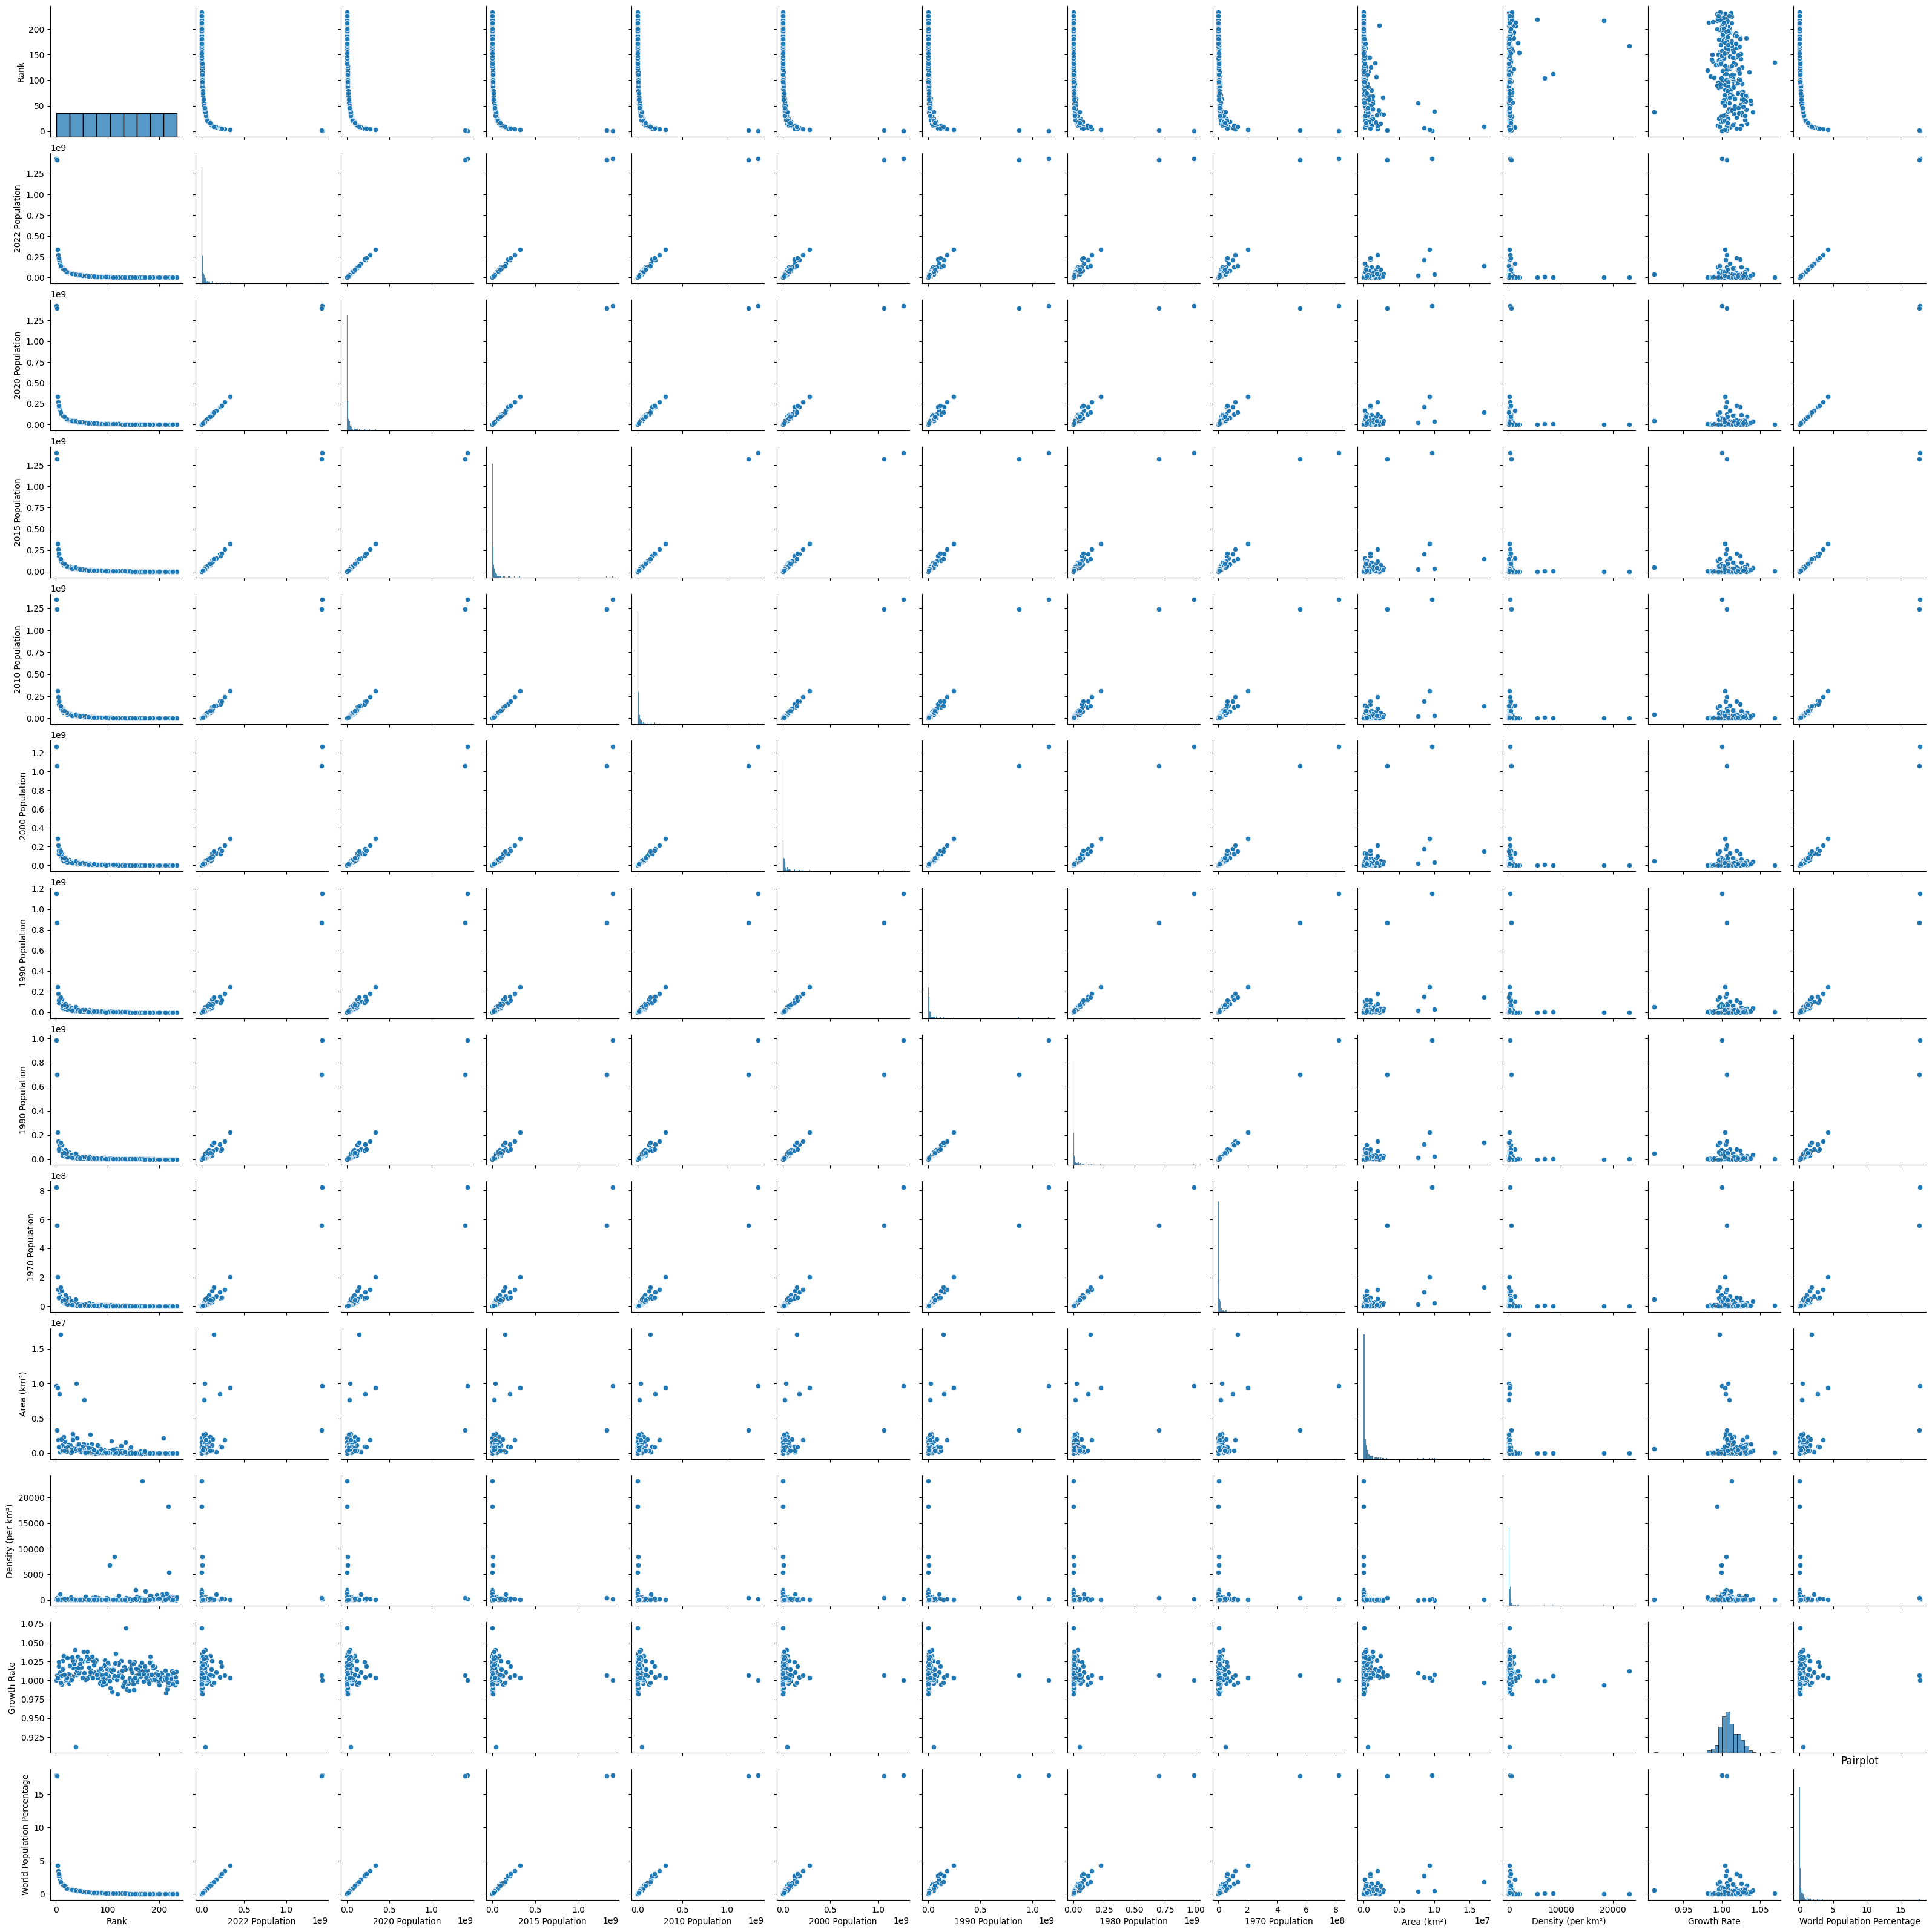

In [26]:
# Парные диаграммы (pairplots)
sns.pairplot(df)
plt.title('Pairplot')
plt.show()


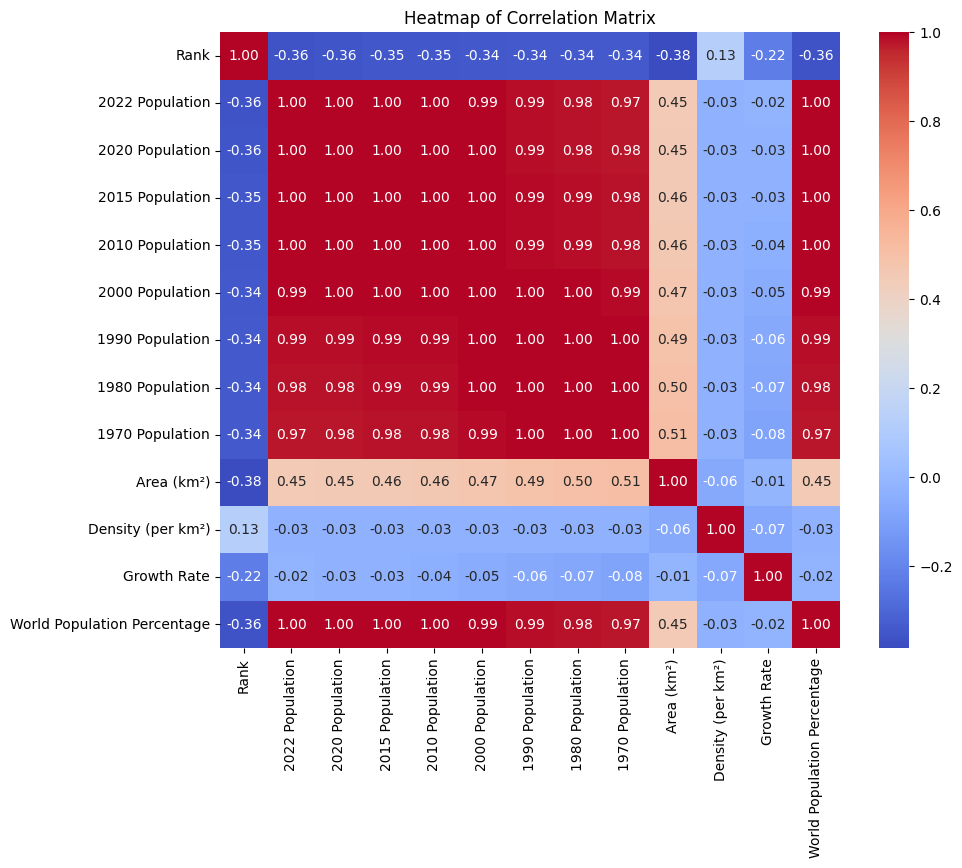

In [25]:
# Тепловая карта по матрице корреляции
numeric_df = df.select_dtypes(include=['number'])
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap of Correlation Matrix')
plt.show()


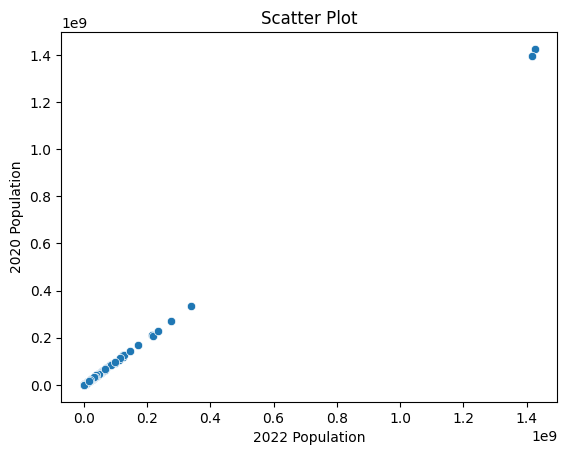

In [32]:
# Диаграмма рассеяния используемая для динамики населения
sns.scatterplot(data=df, x='2022 Population', y='2020 Population')
plt.title('Scatter Plot')
plt.show()

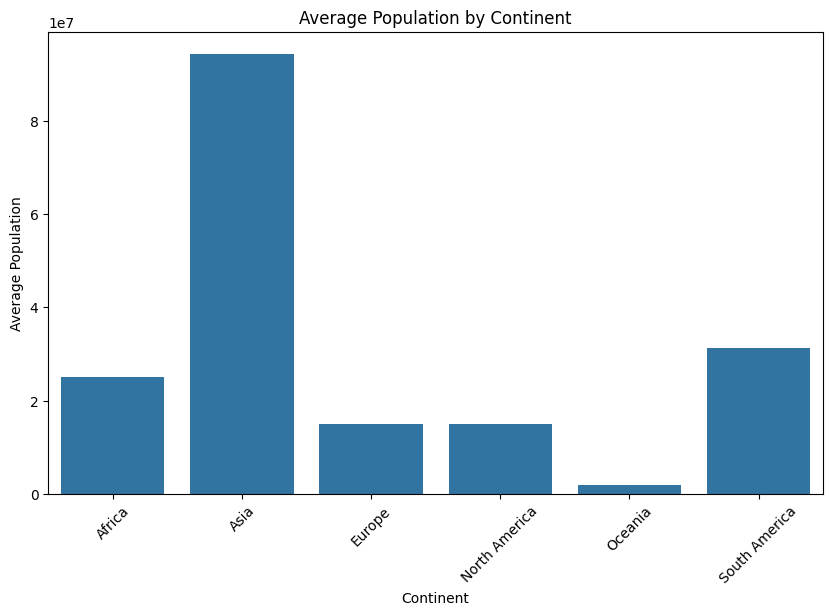

In [33]:
pivot_table_continent = df.pivot_table(index='Continent', values='2022 Population', aggfunc='mean')

# Сводная диаграмма среднего населения по континентам
plt.figure(figsize=(10, 6))
sns.barplot(x=pivot_table_continent.index, y=pivot_table_continent['2022 Population'])
plt.title('Average Population by Continent')
plt.xlabel('Continent')
plt.ylabel('Average Population')
plt.xticks(rotation=45)
plt.show()

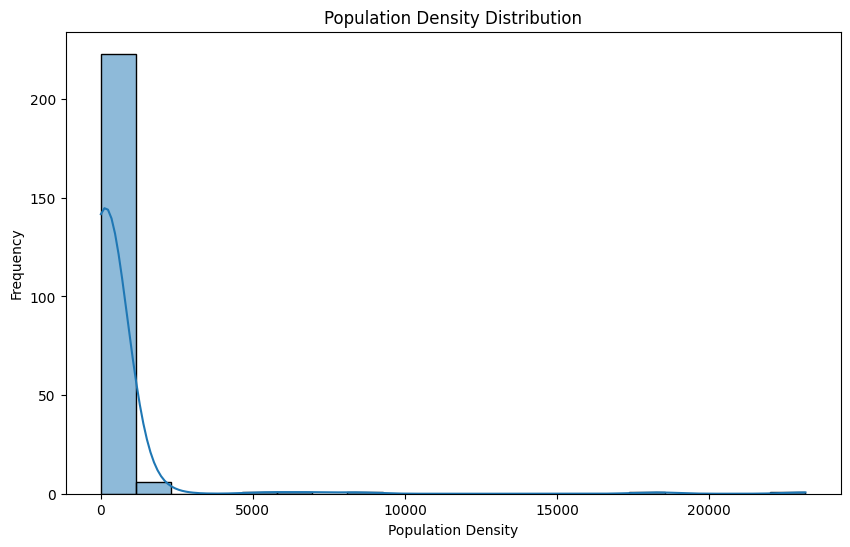

In [34]:
# Гистограма плотности населения
plt.figure(figsize=(10, 6))
sns.histplot(df['Density (per km²)'], bins=20, kde=True)
plt.title('Population Density Distribution')
plt.xlabel('Population Density')
plt.ylabel('Frequency')
plt.show()

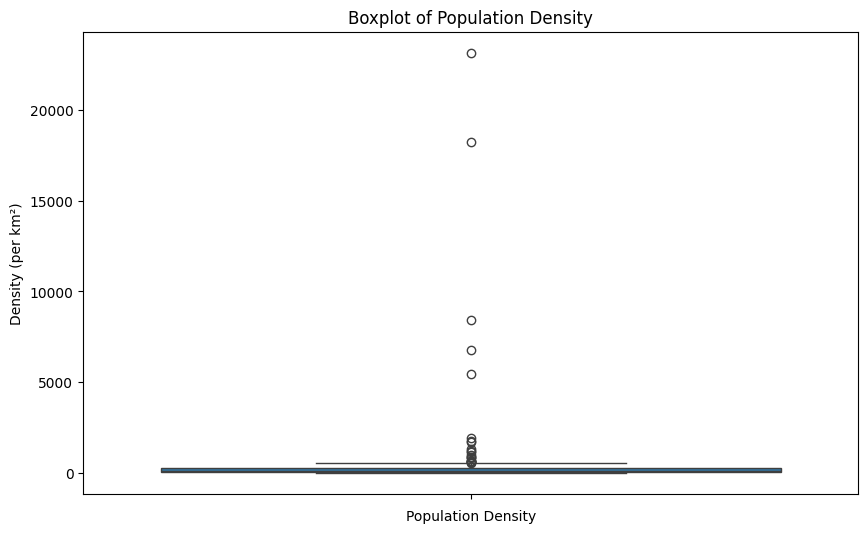

In [35]:
# Диаграмма размаха с помощью seaborn
plt.figure(figsize=(10, 6))
sns.boxplot(data=df['Density (per km²)'])
plt.title('Boxplot of Population Density')
plt.xlabel('Population Density')
plt.show()

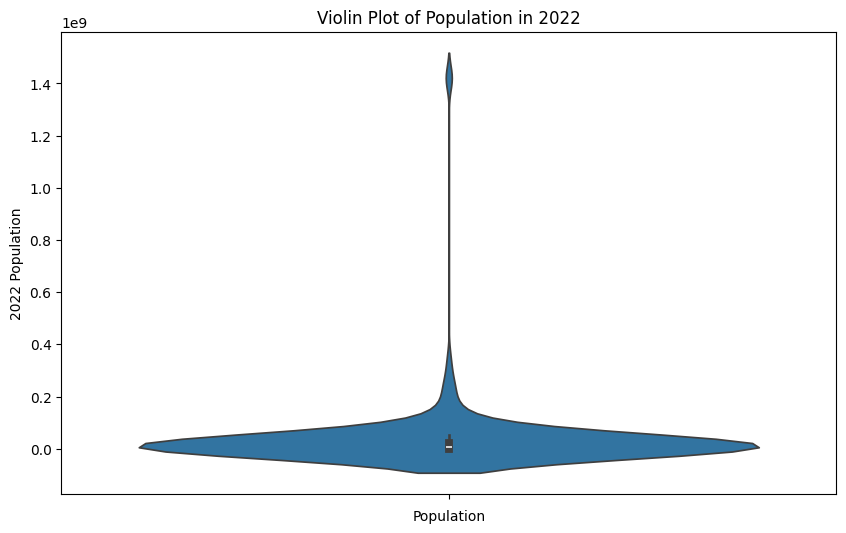

In [36]:
# Скрипичная диаграммы с помощью seaborn
plt.figure(figsize=(10, 6))
sns.violinplot(data=df['2022 Population'])
plt.title('Violin Plot of Population in 2022')
plt.xlabel('Population')
plt.show()

In [26]:
def analyze_data(df):
    # Динамика изменения населения по регионам
    plt.figure(figsize=(40, 10))
    sns.lineplot(data=df, x='Country/Territory', y='2022 Population', hue='Continent')
    plt.title('Population Dynamics by Country/Territory')
    plt.xlabel('Country/Territory')
    plt.ylabel('2022 Population')
    plt.xticks(rotation=90)
    plt.legend(title='Continent')
    plt.show()
    
    # Процентное соотношение населения по регионам
    plt.figure(figsize=(10, 6))
    df_continent_percentage = df.groupby('Continent')['2022 Population'].sum() / df['2022 Population'].sum() * 100
    df_continent_percentage.plot(kind='bar', color='skyblue')
    plt.title('Population Percentage by Continent')
    plt.xlabel('Continent')
    plt.ylabel('Population Percentage')
    plt.xticks(rotation=45)
    plt.show()
    
    # Корреляция между признаками
    numeric_df = df.select_dtypes(include=['number'])
    plt.figure(figsize=(10, 8))
    sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Correlation Matrix')
    plt.show()

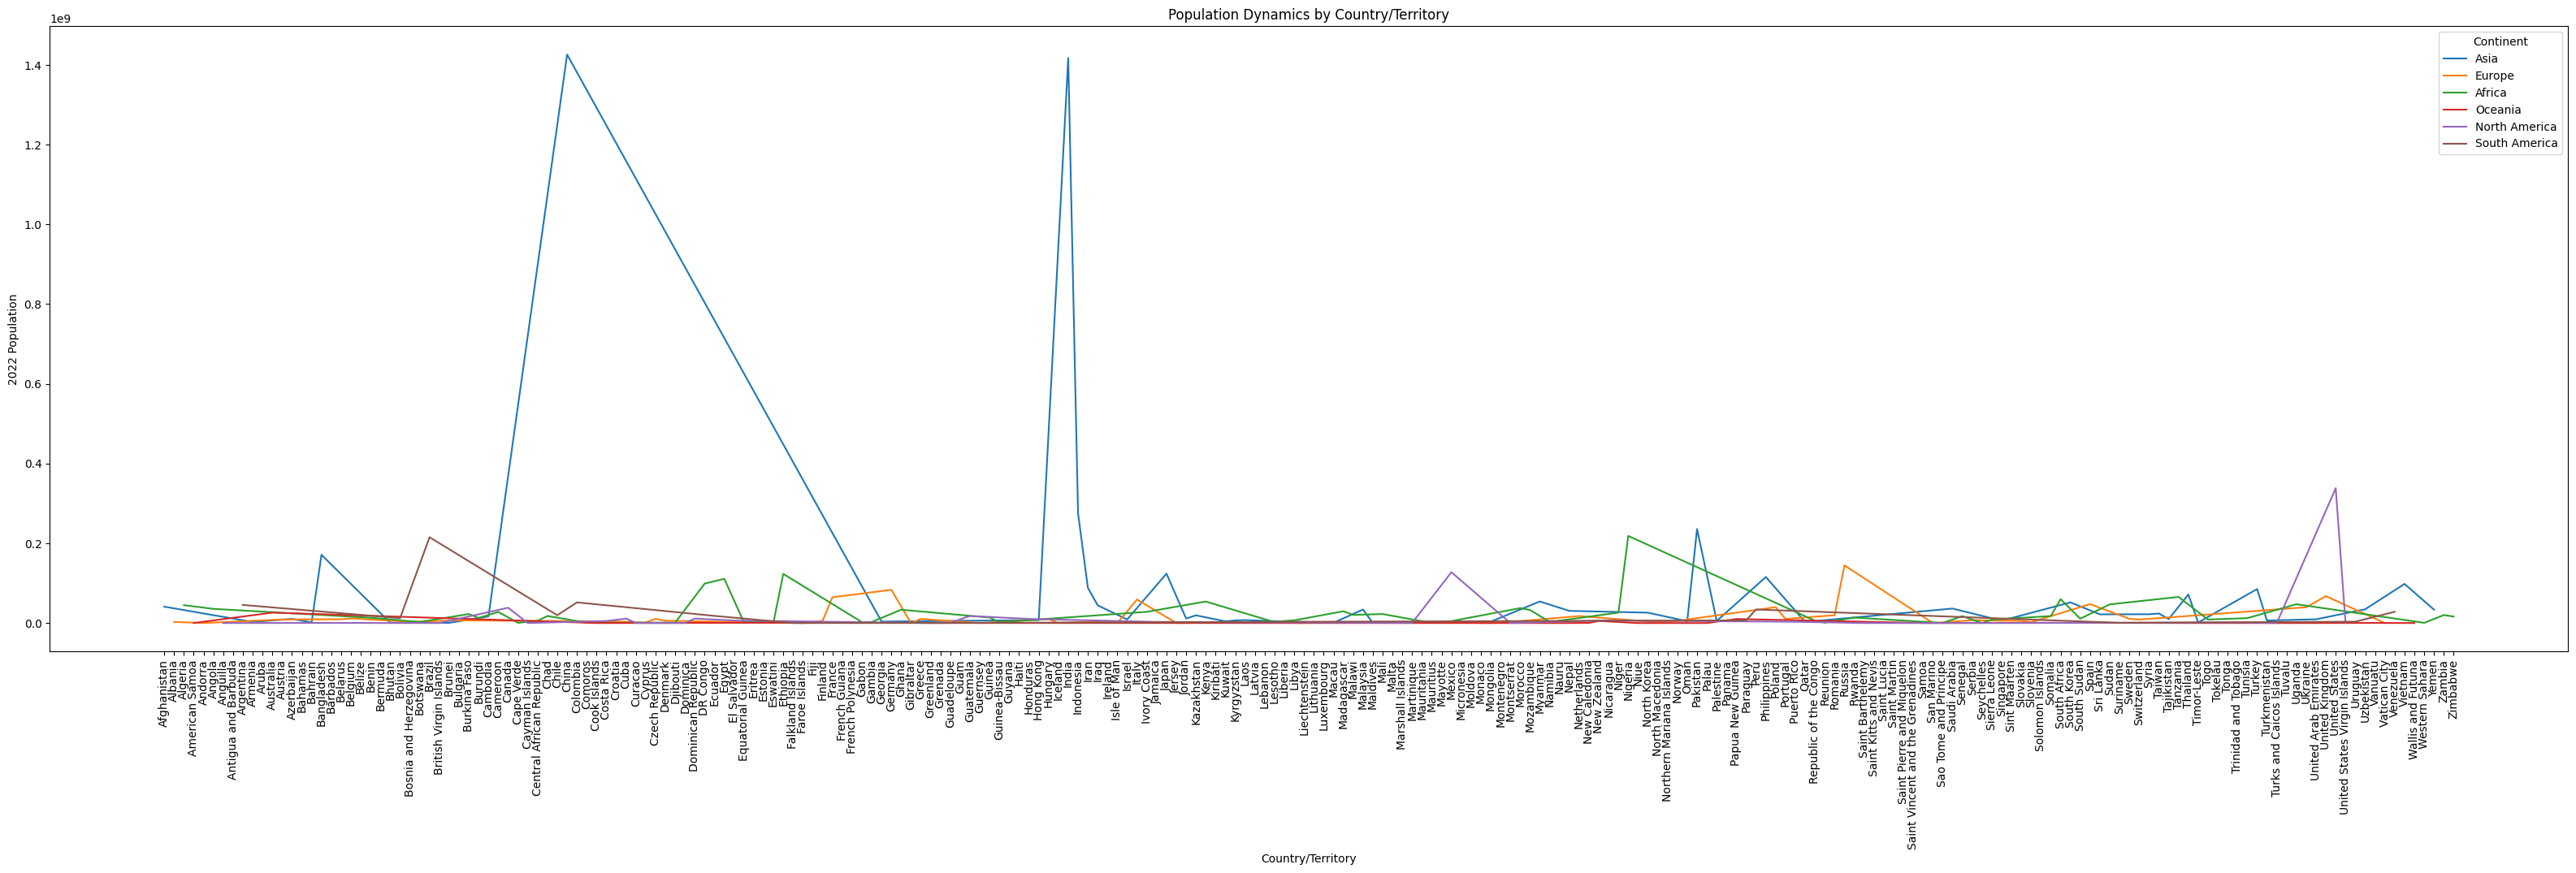

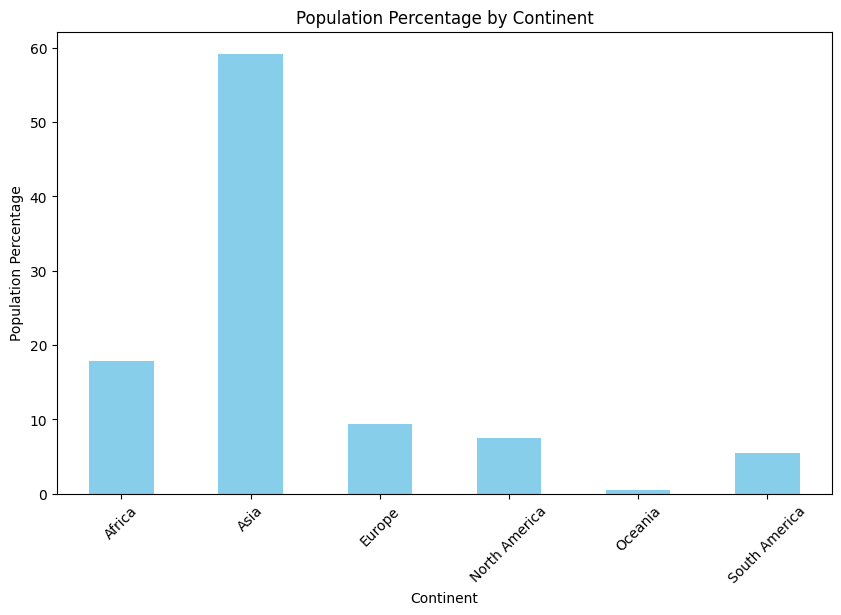

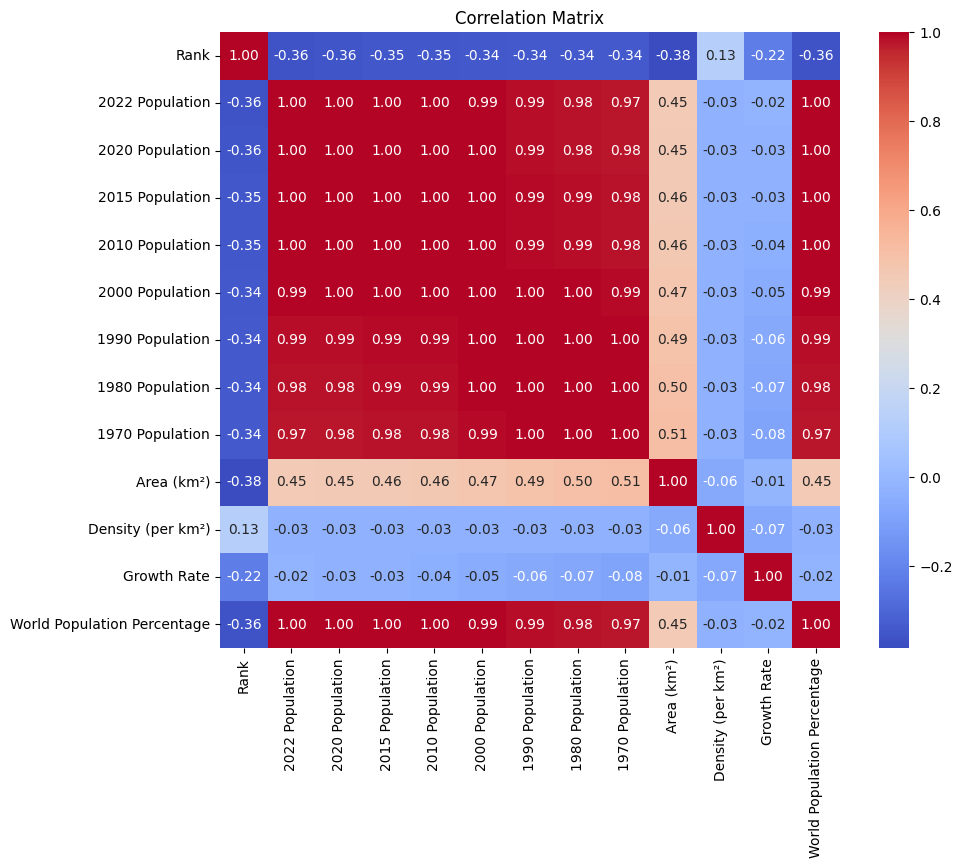

In [27]:
analyze_data(df)